In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import json
plt.rcParams['figure.dpi'] = 150

# Utility Functions

In [2]:
def n_steps(record):
    return len(record['states'])

def nan_wrapper(x):
    return 0 if x is None else x

def get_l0_goal_estimates(record, player):
    return [nan_wrapper(state['l0GoalEstimation' + player][1]) for state in record['states']]

def get_l1_goal_estimates(record, player, chis):
    def expectation(series):
        return sum(nan_wrapper(x) * chi for x, chi in zip(series, chis))
    return [expectation(state['l1GoalEstimation' + player]) for state in record['states']]

# Visualizing States

In [3]:
def state_to_image(ctx, state):
    size = 48
    yellow_robot = Image.open(r'../images/yellow_robot.bmp').resize((size, size))
    red_robot = Image.open(r'../images/red_robot.bmp').resize((size, size))
    yellow_resrc = Image.open(r'../images/yellow_bucket.bmp').resize((size, size))
    red_resrc = Image.open(r'../images/red_bucket.bmp').resize((size, size))
    flower = Image.open(r'../images/flower.bmp').resize((size, size))
    tree = Image.open(r'../images/tree.bmp').resize((size, size))
    n_side = ctx['nSide']
    result = Image.new('RGBA', (n_side * size, n_side * size), 'white')
    s = state['state']
    result.paste(yellow_robot, (s[1] * size, s[0] * size))
    result.paste(red_robot, (s[3] * size, s[2] * size))
    result.paste(yellow_resrc, (s[5] * size, s[4] * size))
    result.paste(red_resrc, (s[7] * size, s[6] * size))
    goals = ctx['allGoals']
    result.paste(flower, (goals[0][1] * size, goals[0][0] * size))
    result.paste(tree, (goals[1][1] * size, goals[1][0] * size))

    return result

def visualize_states(record):
    fig, ax = plt.subplots(3, 7, figsize=(16, 7))
    ax = ax.flatten()
    for i in range(n_steps(record)):
        ax[i].set_title(f't = {i}')
        ax[i].set_yticks([])
        ax[i].set_xticks([])
        ax[i].imshow(state_to_image(record['ctx'], record['states'][i]))
    plt.show()

# Visualizing Action Probabilities

In [4]:
ACTION_LABELS = ['Nop', 'Right', 'Left', 'Down', 'Up']

def visualize_action_probs(record):
    fig, ax = plt.subplots(2, 1, figsize=(20, 7))
    for i, agent in enumerate(['A', 'B']):
        ax[i].set_ylim(0, 1)
        ax[i].set_xticks(range(n_steps(record)))
        ax[i].set_xlabel("Step")
        ax[i].set_ylabel(f"Action Probability for {agent}")
        ax[i].vlines(range(n_steps(record)), 0, 1, linestyles='dashed')
        for a in range(5):
            ax[i].plot([state['probAction' + agent][a] for state in record['states']], label=ACTION_LABELS[a])
        for t, s in enumerate(record['states']):
            max_prob = s['probAction' + agent][s['action' + agent]]
            ax[i].text(t, max_prob + 0.05, ACTION_LABELS[s['action' + agent]], ha='center')
        ax[i].legend()
    plt.show()

# Visualizing Estimations

In [5]:
def visualize_physical_goal_estimations(record, ax):
    ax.set_title("Physical Goal Estimation")
    ax.set_xlabel("Step")
    ax.set_ylabel("Flower ← Est. → Tree")
    ax.set_xticks(range(n_steps(record)))
    ax.plot(get_l0_goal_estimates(record, 'A'), 'y')
    ax.plot(get_l0_goal_estimates(record, 'B'), 'r')

def visualize_social_goal_estimations(record, ax, chis):
    ax.set_title("Social Goal Estimation")
    ax.set_xlabel("Step")
    ax.set_ylabel("Hinder ← Est. → Help")
    ax.set_xticks(range(n_steps(record)))
    ax.plot(get_l1_goal_estimates(record, 'A', chis), 'y')
    ax.plot(get_l1_goal_estimates(record, 'B', chis), 'r')

def visualize_estimations(record, chis):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    visualize_physical_goal_estimations(record, ax[0])
    visualize_social_goal_estimations(record, ax[1], chis)
    plt.show()

def visualize_record(filename, chis):
    with open(filename) as f:
        record = json.load(f)
    visualize_estimations(record, chis)
    visualize_action_probs(record)
    visualize_states(record)
    # Visualize estimation curves.
    pass

# Playground

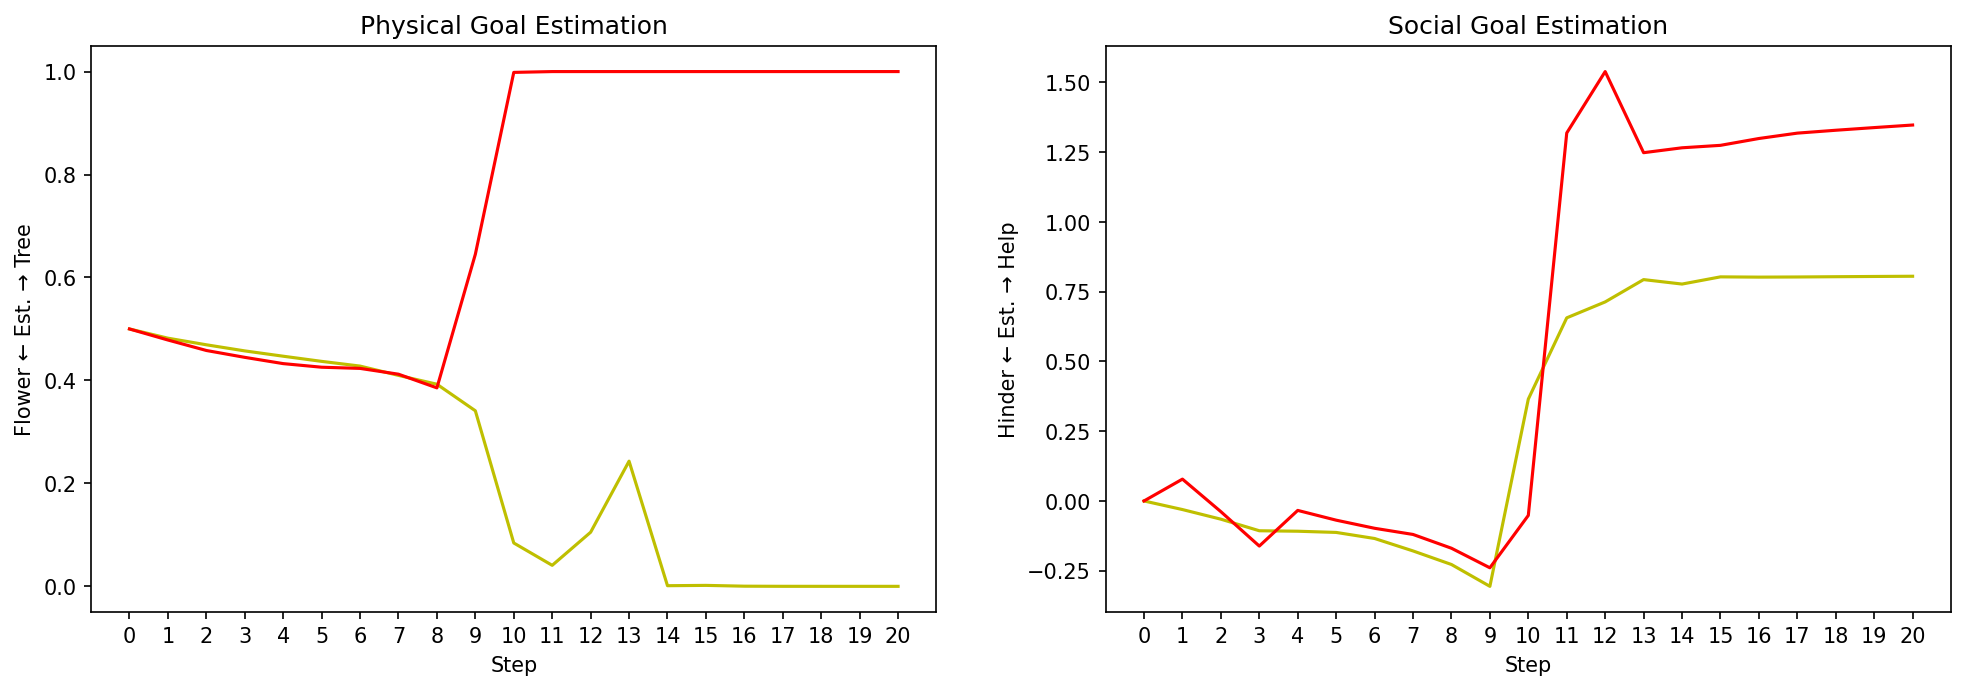

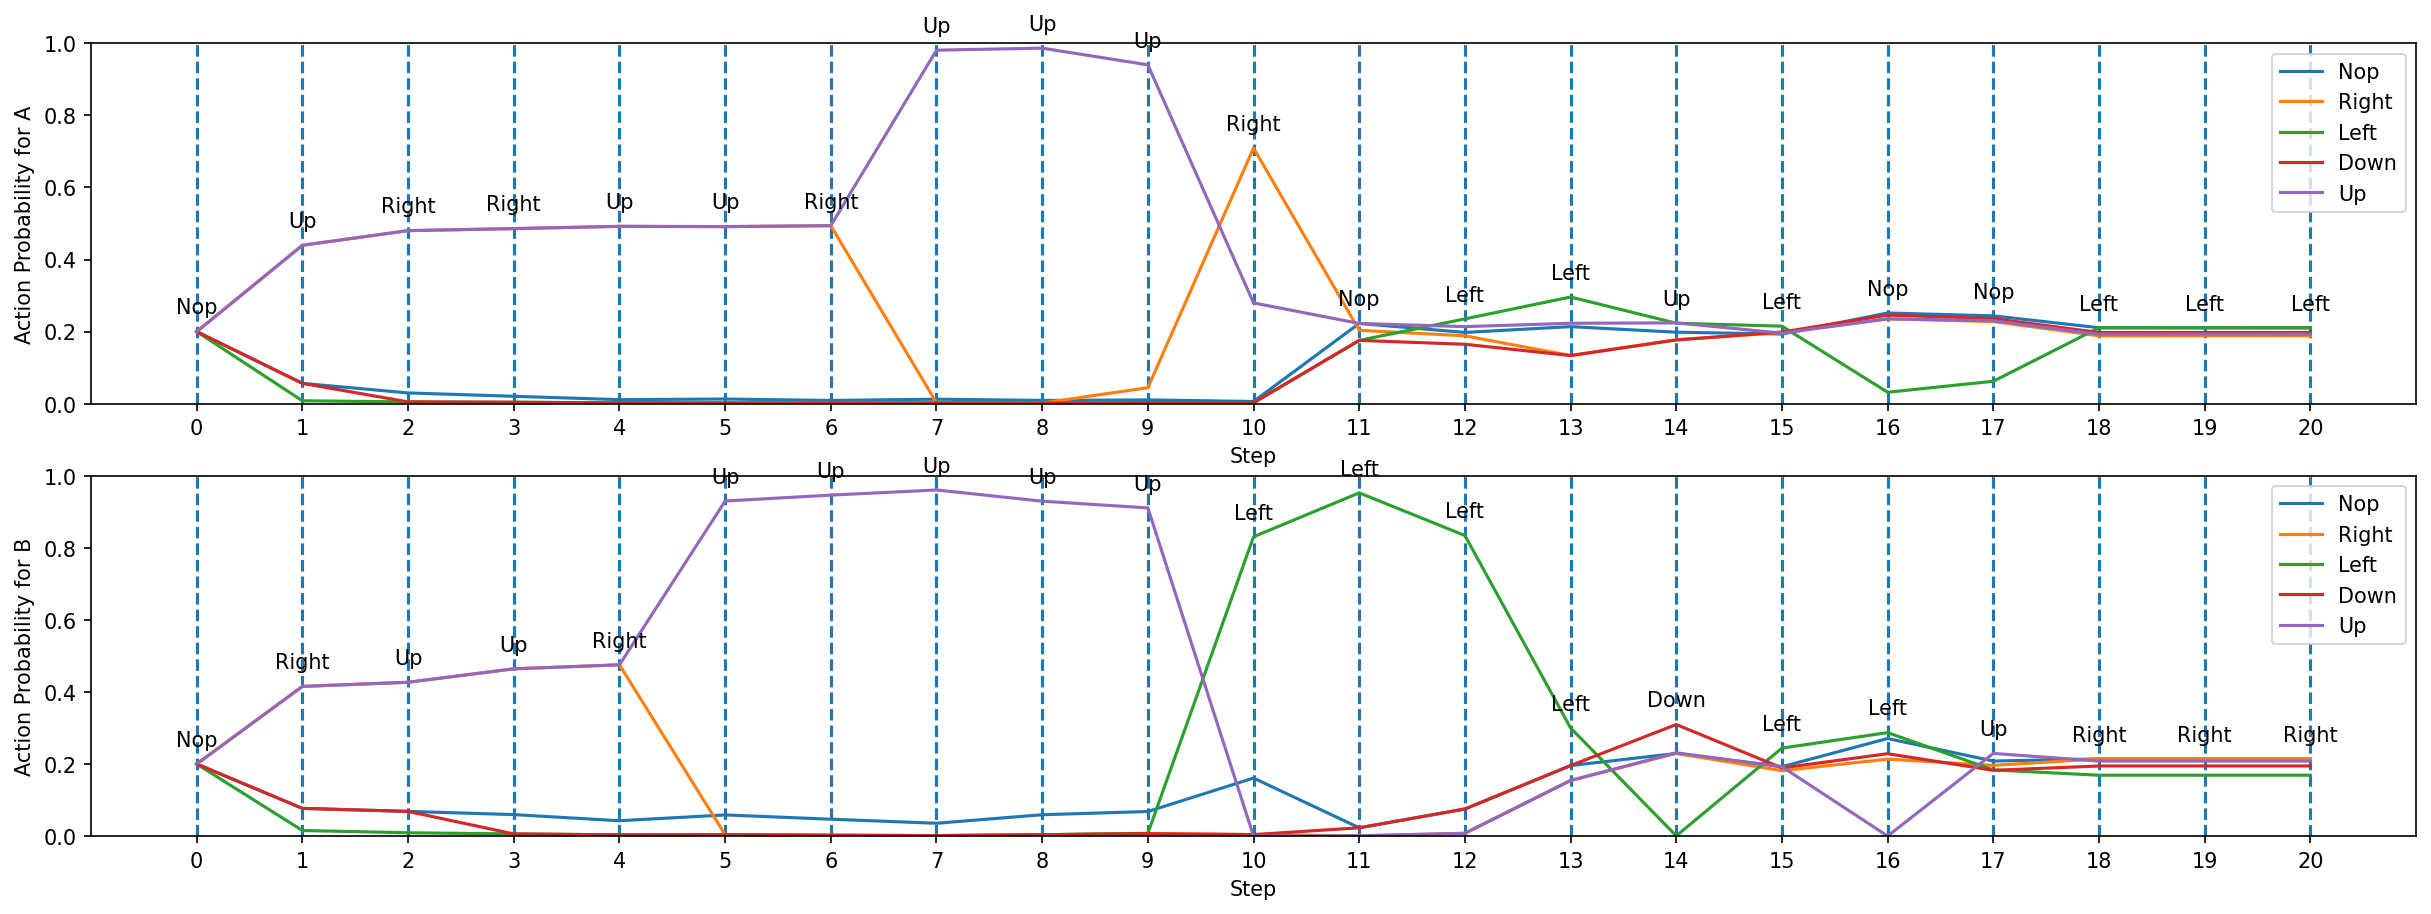

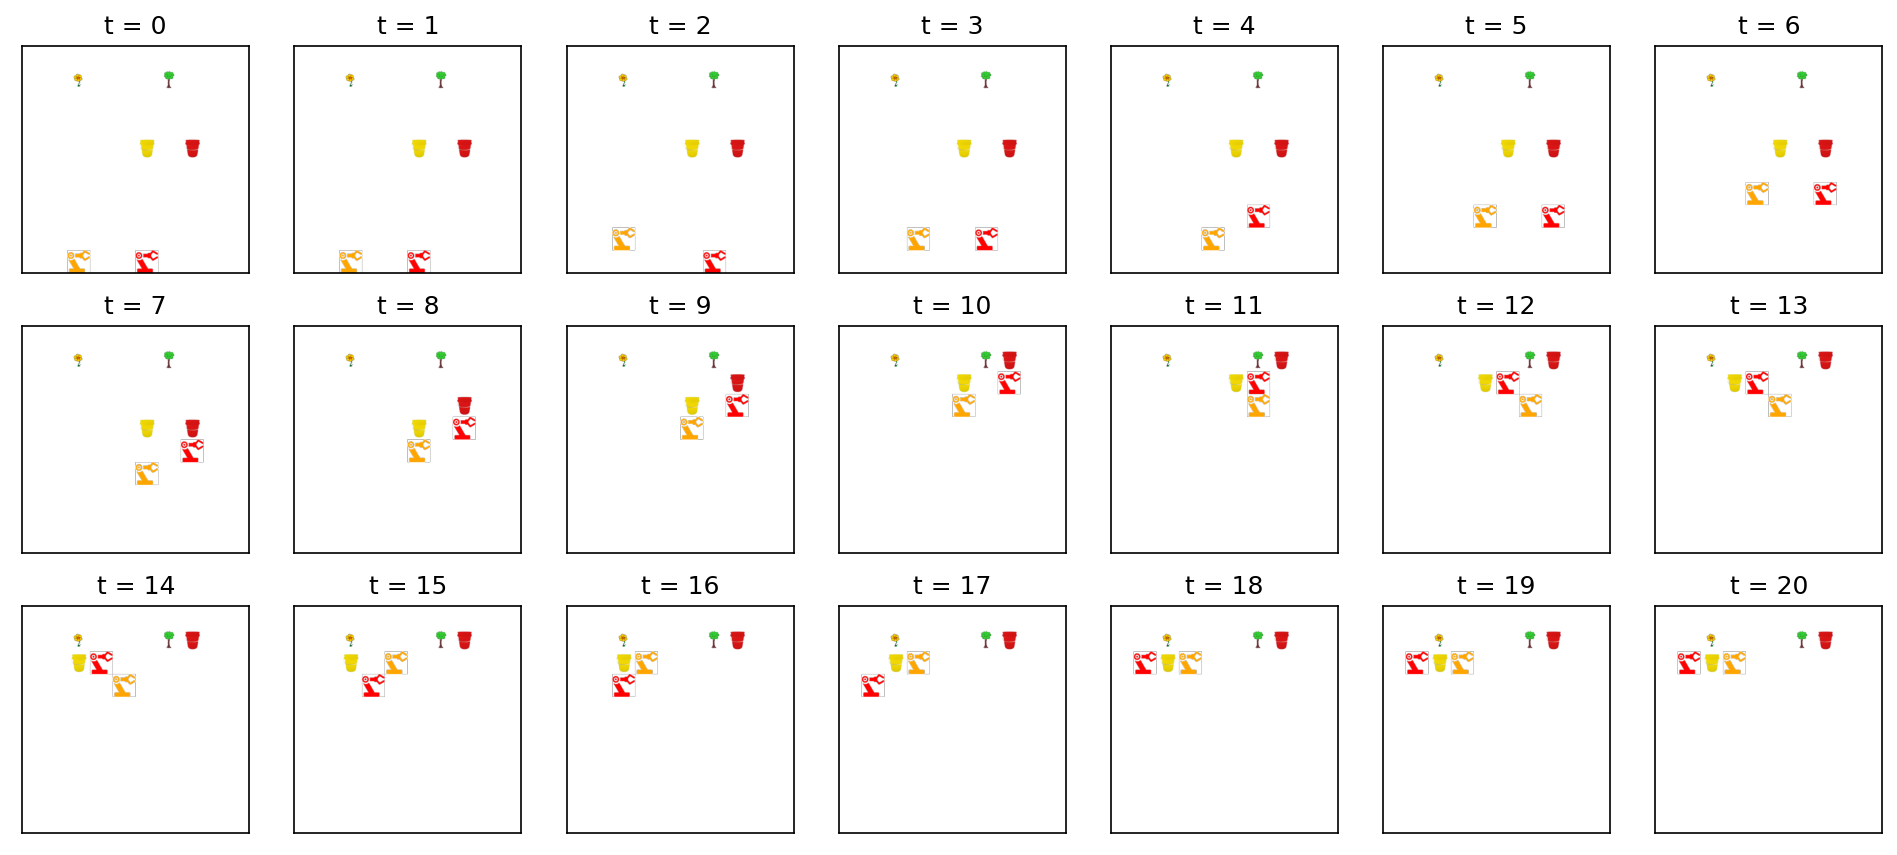

In [6]:
visualize_record('records/record 02-06-2022 14-50-06.json', [-2, -1, -0.5, 0, 0.5, 1, 2])

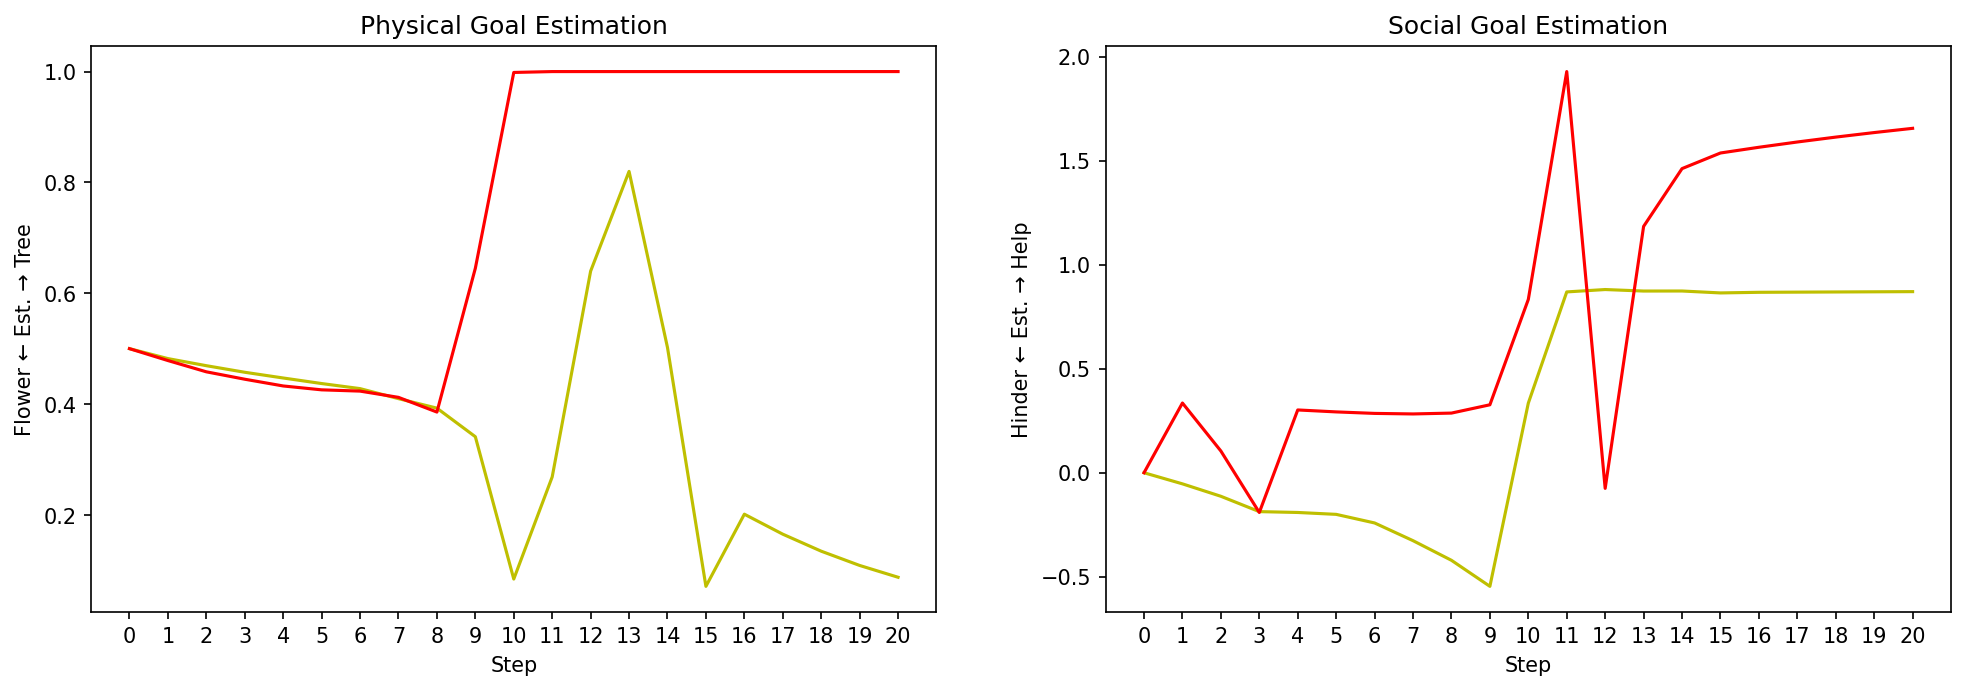

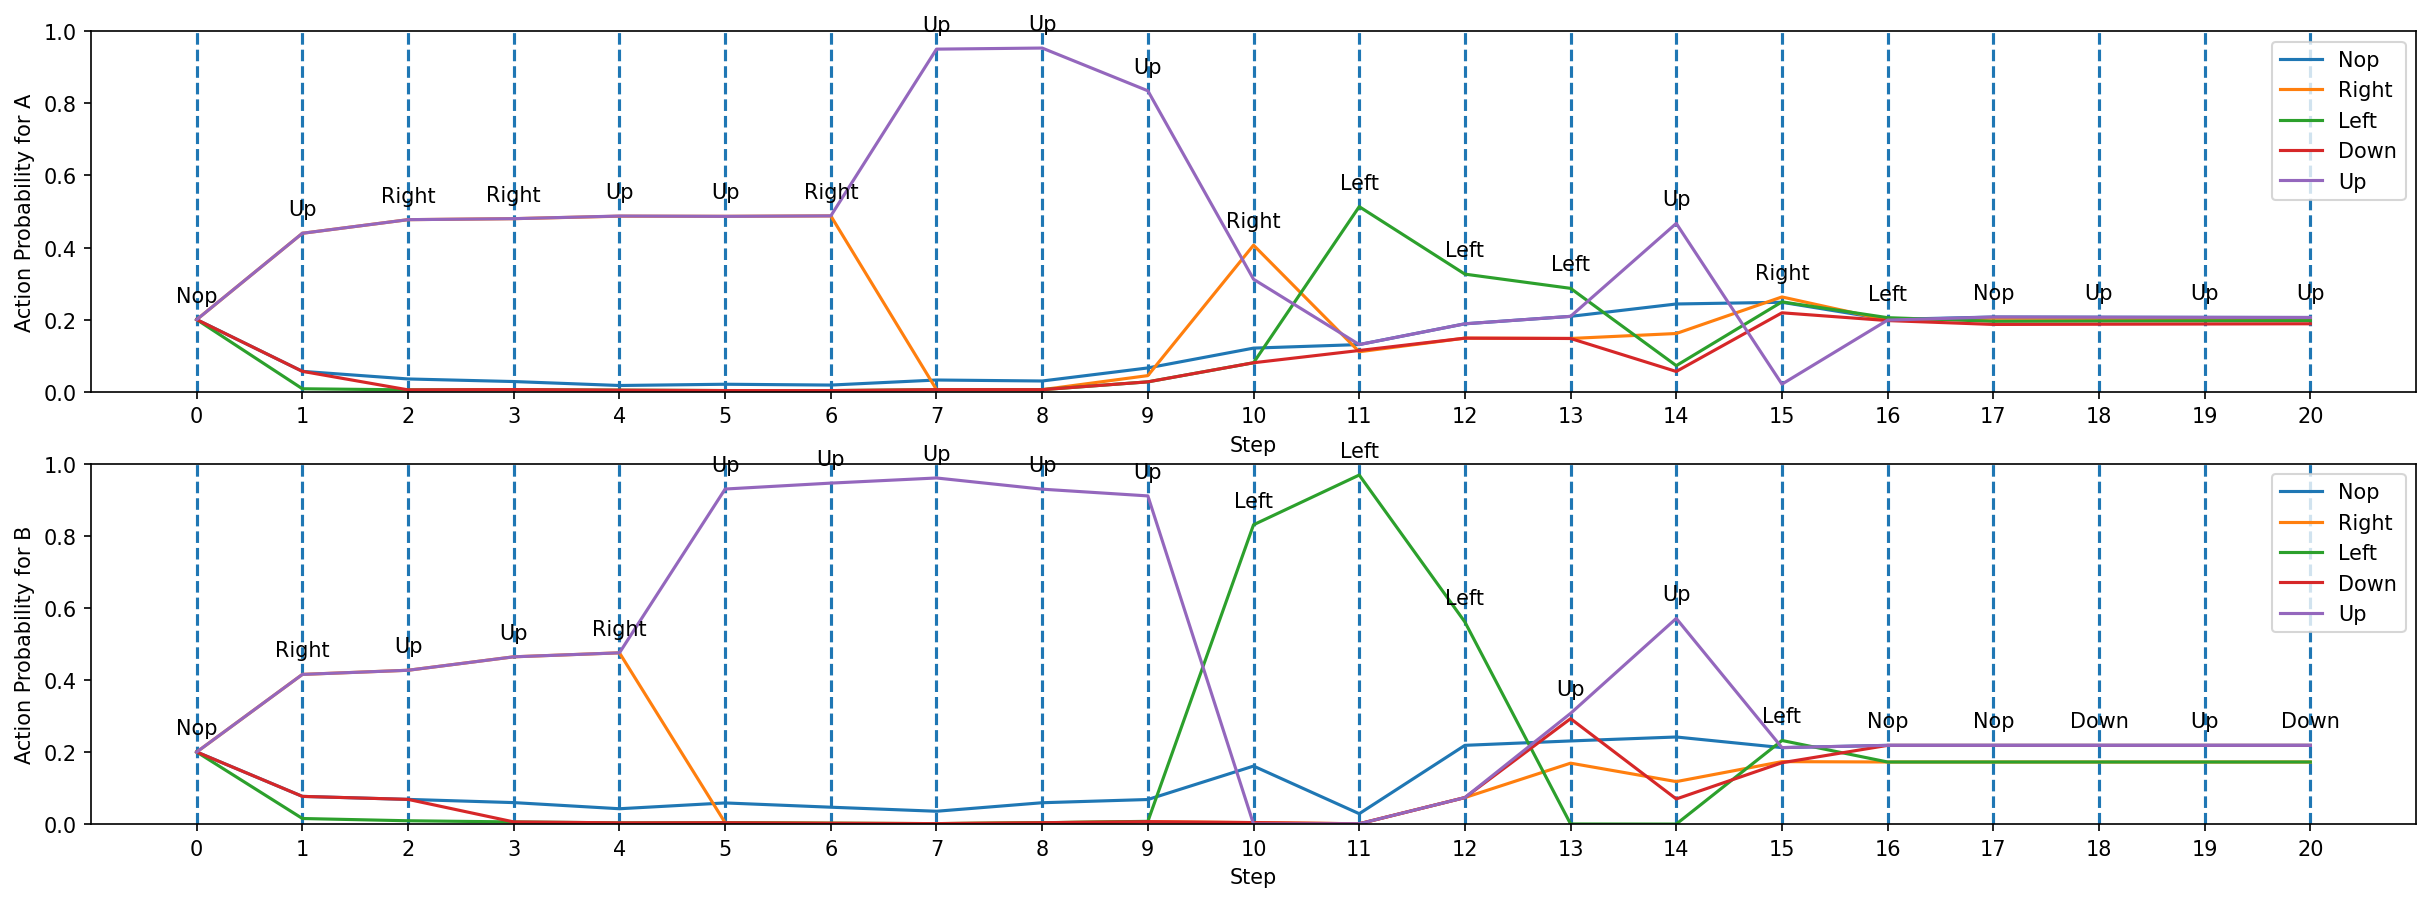

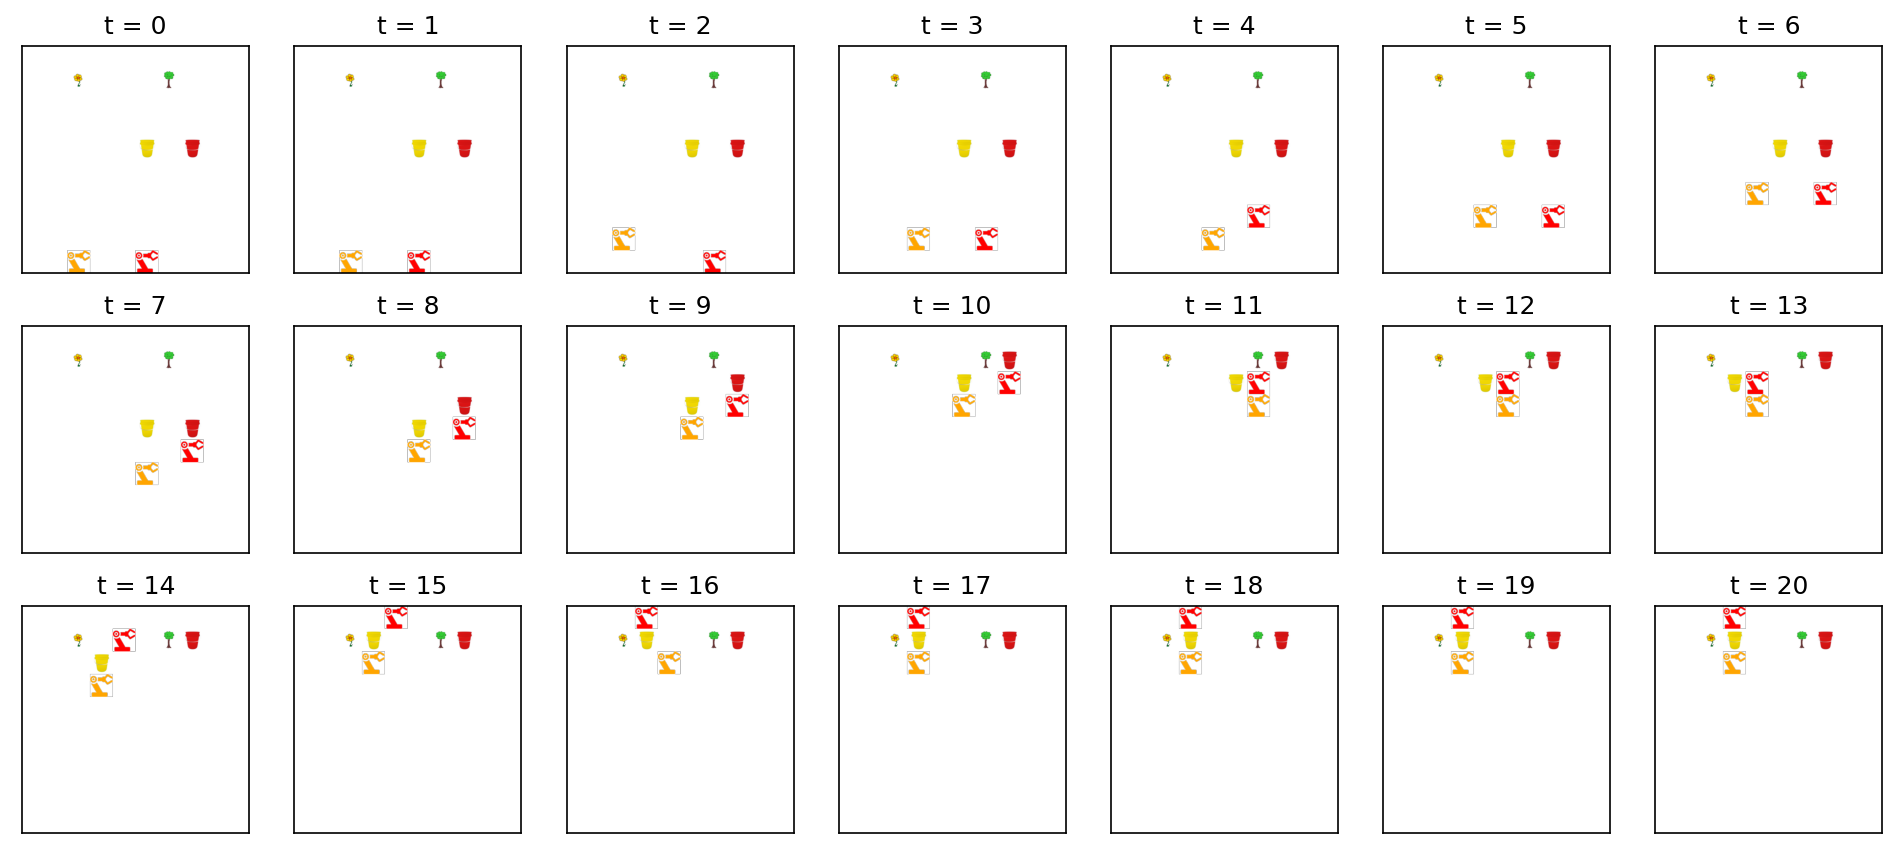

In [7]:
visualize_record('records/record 01-06-2022 22-09-57.json', [-2, 0, 2])